<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/MCDWT-experimentos/blob/master/src/PRMC_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [PRMC](https://github.com/Sistemas-Multimedia/PRMC)$(T=1,N=5)$
Calculamos la transformada directa e inversa de una iteración, a 5 imágenes. La descomposición espacial y temporal generada se puede ver [aquí](https://sistemas-multimedia.github.io/PRMC/#x1-20001r7).

In [1]:
%matplotlib inline
from load_and_display import *

# The results depends on the wavelet (see http://wavelets.pybytes.com):
#wavelet = "haar"
wavelet = "bior3.5"
#wavelet = "rbio3.5"
#wavelet = "db5"
#wavelet = "db9"

## Paso 1: $\mathtt{MDWT}(N=5)$

Aplicamos la 2D-DWT una iteración a cada una de las imágenes de la secuencia. La descomposición en subbandas generada es [esta](https://sistemas-multimedia.github.io/PRMC/#x1-10001r3).

In [2]:
%%bash

# You must be in the ’src’ directory to run this.
rm -f /tmp/*.png  
cp ../sequences/stockholm/*.png /tmp  
 
# 1-iteration MDWT.  
python3 -O MDWT.py -p /tmp/  

## Paso 2: $\mathtt{MCOLP}(T=1, N=5)$
Ahora compensamos la subbandas $F_1.H$ usando las subbandas $F_0.H$ y $F_2.H$ como referencia, y las subbandas $F_0.L$ y $F_2.L$ para estimar el movimiento. Como la DWT no es invariante al desplazamiento, en lugar de compensar en el dominio DWT compensamos en el dominio OLP.

In [3]:
%%bash

# Hacemos una copia de las subbandas que vamos a compensar para luego poder comparar con lo que teníamos

rm -rf /tmp/tmp
mkdir /tmp/tmp
cp /tmp/LH001.png /tmp/tmp 
cp /tmp/HL001.png /tmp/tmp
cp /tmp/HH001.png /tmp/tmp
cp /tmp/LH003.png /tmp/tmp
cp /tmp/HL003.png /tmp/tmp
cp /tmp/HH003.png /tmp/tmp

In [4]:
%%bash

predictor=1  
iterations=1  
 
# 1-iteration MCDWT.  
python3 -O MCOLP.py -P $predictor -p /tmp/ -T $iterations  

In [5]:
%%bash

# Show the length of the original subbands and compensated subbands.
ls -lh /tmp/tmp/LH001.png
ls -lh /tmp/LH001.png
ls -lh /tmp/tmp/HL001.png
ls -lh /tmp/HL001.png
ls -lh /tmp/tmp/HH001.png
ls -lh /tmp/HH001.png
ls -lh /tmp/tmp/LH003.png
ls -lh /tmp/LH003.png
ls -lh /tmp/tmp/HL003.png
ls -lh /tmp/HL003.png
ls -lh /tmp/tmp/HH003.png
ls -lh /tmp/HH003.png

# Has changed in length any of them? Remember that a change in lenght  
# implies a change in content.  

-rw-r--r-- 1 vruiz vruiz 698K ene 14 15:35 /tmp/tmp/LH001.png
-rw-r--r-- 1 vruiz vruiz 701K ene 14 15:35 /tmp/LH001.png
-rw-r--r-- 1 vruiz vruiz 697K ene 14 15:35 /tmp/tmp/HL001.png
-rw-r--r-- 1 vruiz vruiz 696K ene 14 15:35 /tmp/HL001.png
-rw-r--r-- 1 vruiz vruiz 494K ene 14 15:35 /tmp/tmp/HH001.png
-rw-r--r-- 1 vruiz vruiz 516K ene 14 15:35 /tmp/HH001.png
-rw-r--r-- 1 vruiz vruiz 698K ene 14 15:35 /tmp/tmp/LH003.png
-rw-r--r-- 1 vruiz vruiz 701K ene 14 15:35 /tmp/LH003.png
-rw-r--r-- 1 vruiz vruiz 696K ene 14 15:35 /tmp/tmp/HL003.png
-rw-r--r-- 1 vruiz vruiz 696K ene 14 15:35 /tmp/HL003.png
-rw-r--r-- 1 vruiz vruiz 494K ene 14 15:35 /tmp/tmp/HH003.png
-rw-r--r-- 1 vruiz vruiz 517K ene 14 15:35 /tmp/HH003.png


Como se puede apreciar, la longitud de los ficheros `LH001` (antes: 698K, ahora: 701K), `HL001` (antes: 697K, ahora: 696K), `HH001` (antes: 494K, ahora: 516K), `LH003` (antes: 698K, ahora: 701K), `HL003` (antes: 696K, ahora: 696K), y `HH003` (antes: 494K, ahora: 517K), han cambiado (el resto de subbandas permanecen inalteradas). Estas son las subbandas que MCOLP *intenta* despojar de contenido visual mediante la compensación de movimiento. Como se puede ver, en algunos casos la entropía de orden N (suponiendo que la longitud de los archivos comprimidos con PNG sea proporcional a la entropía de orden N, donde N depende de cómo se está usando PNG) ha aumentado y en otros ha disminuido. Evidéntemente, lo mejor sería que siempre existiera una disminución, pero desde un punto de vista puramente visual, lossy, lo importante es que en dichas subbandas (las compensadas) desaparezcan las estructuras visualmente reconocibles. Esto significa que, si prescindiéramos completamente de dichas subbandas, un ser humano podría no darse cuenta de que esta información ya no está en el vídeo descomprimido.

Hay que considerar también otra fuente de ruido que puede perjudicar a la entropía de los residuos, y es que la implementación de la DWT que hemos usado ([PyWavelets](https://pywavelets.readthedocs.io/en/latest/)) trabaja en punto flotante, lo que significa que la transformada no es completamente reversible a causa del error de redondeo.

Esto es lo que ocurre visualmente ...

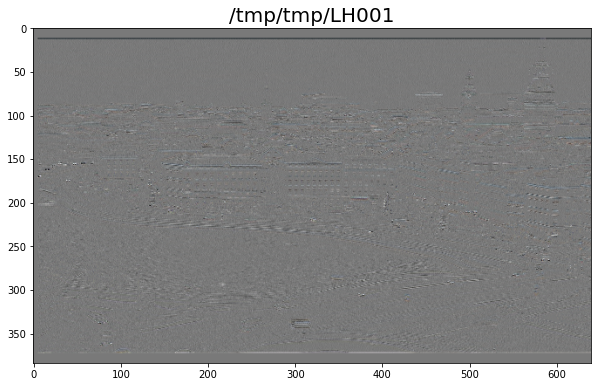

In [6]:
show_img("/tmp/tmp/LH001") # Esta es la subbanda sin compensar

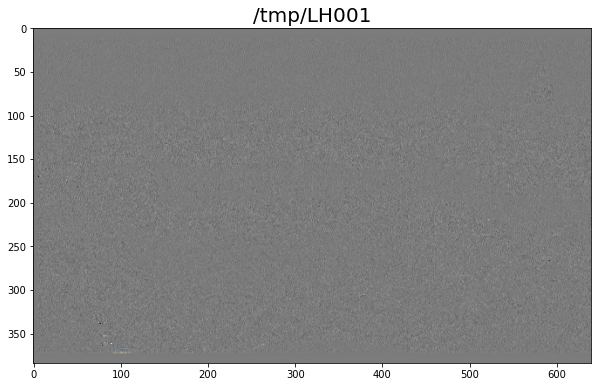

In [7]:
show_img("/tmp/LH001") # Y esta la subbanda compensada

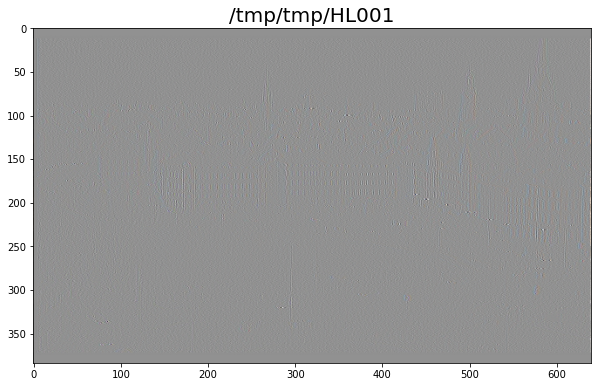

In [8]:
show_img("/tmp/tmp/HL001") # Sin compensar

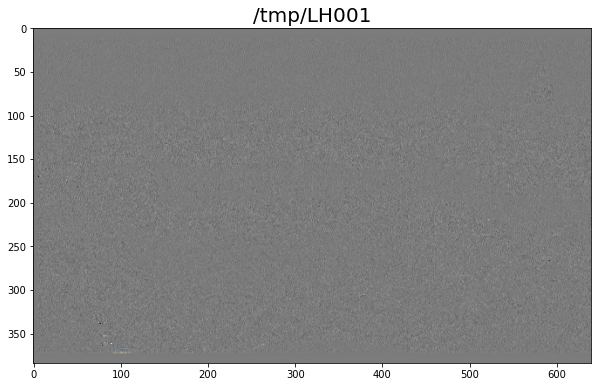

In [9]:
show_img("/tmp/LH001") # Compensada

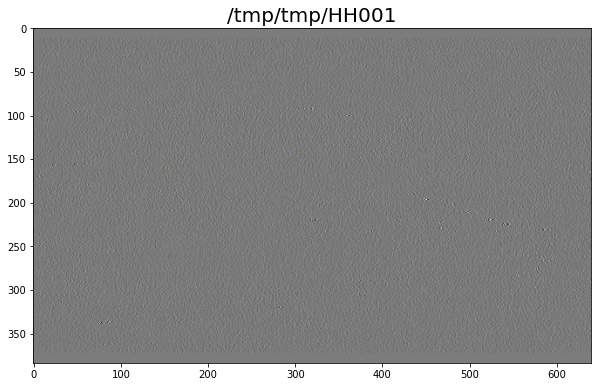

In [10]:
show_img("/tmp/tmp/HH001") # Sin compensar

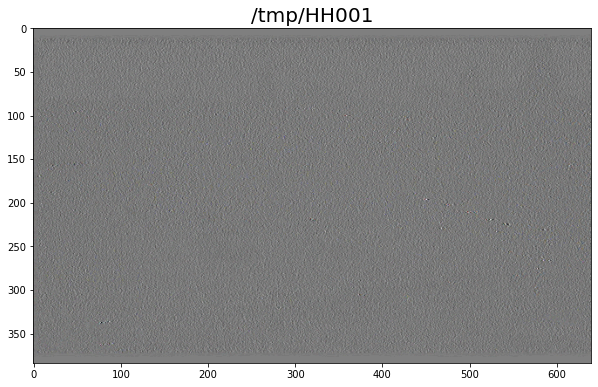

In [11]:
show_img("/tmp/HH001") # Compensada

El parámetro $T=1$ que se le pasa al script $\mathtt{MCOLP}$ le indica que debe aplicar la [mariposa](https://sistemas-multimedia.github.io/PRMC/#x1-180009.1) una sola vez a todo el vídeo.

El parámetro `predictor=1` le indica a $\mathtt{MCOLP}$ que use como predicción la media aritmética de la predicción hacia delante y la predicción hacia detrás. Puede ser interesante saber que hay más posibilidades:

In [12]:
%%bash
python3 MCOLP.py -h

io/__init__.py loaded
usage: MCOLP.py [-h] [-b] [-p PREFIX] [-N DECOMPOSITIONS] [-T ITERATIONS]
                [-w WAVELET] [-P PREDICTOR]

Motion Compensation in the Orthogonal Laplacian Pyramid

Example:

  yes | cp ../sequences/stockholm/* /tmp/
  python3 -O MDWT.py     -p /tmp/
  python3 -O MCOLP.py    -p /tmp/
  python3 -O MCOLP.py -b -p /tmp/
  python3 -O MDWT.py  -b -p /tmp/

optional arguments:
  -h, --help            show this help message and exit
  -b, --backward        Performs backward transform (default: False)
  -p PREFIX, --prefix PREFIX
                        Dir where the files the I/O files are placed (default:
                        /tmp/)
  -N DECOMPOSITIONS, --decompositions DECOMPOSITIONS
                        Number of input decompositions (default: 5)
  -T ITERATIONS, --iterations ITERATIONS
                        Number of temporal iterations (default: 2)
  -w WAVELET, --wavelet WAVELET
                        Wavelet name (default: bior3.5)
  -P PREDICT

Todas las predicciones están basadas en la [estimación del flujo óptico denso](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html#dense-optical-flow-in-opencv). Por tanto, en uno se los sentidos (hacia delante o hacia detrás), habría tantos vectores de movimiento como pixels se están compensando. Esta información la puede recrear el descompresor si reconstruye la subbanda LL sin pérdida (en este ejemplo la subbanda LL no se está comprimiendo con pérdida). En caso contrario, aparecería un error, que podríamos llamar de drift, y que se incrementa diádicamente para los niveles menor resolución temporal, acotado en cada GOP. En este ejemplo, el tamaño de GOP es 2 porque hemos iterado la MCOLP sólo una vez.

Para evitar el drift basta con usar en el compresor los mismos datos que debería tener el descompresor. Por ejemplo, si queremos usar HEVC intra para comprimir las subbandas $H$, deberíamos usar la versión descomprimida de $L$ (que reconstruirá el descompresor) para estimar el movimiento en el compresor (que estimaría el descompresor). Si usásemos JPEG2000 y capas de calidad, entonces para cada capa habría que realizar una estimación del movimiento, aunque seguramente muchos de los cálculos que se realizarían para la capa 1 servirían para la 2 y así, sucesivamente.

Un aspecto interesante de estimar el movimiento con las subbandas $L$ es que podemos medir la contribución de cada pixel de las imágenes vecinas a la predicción de la subbanda $L$ del frame que se está compensando, y con dicha medición, podemos estimar en qué medida cada frame vecino debería usarse para generar la (subbanda) predicción. Así, por ejemplo, como se explica [aquí](https://sistemas-multimedia.github.io/PRMC/#x1-2600010) (ver Eq. 5), podemos realizar una predicción ponderada estimando el error de predicción. Esto nos puede venir muy bien para cambios de escena, o para la aparición de nuevos objetos.

## Inverse PRMC($T=1, N=5$)
Reconstuímos la secuencia casi (PyWavelets use aritmética en punto flotante) original a partir de la secuencia de subbandas.

In [13]:
%%bash

predictor=1  
iterations=1

# Lets recover the original sequence ...  
rm /tmp/???.png  
 
# 1-iteration iMCDWT.  
python3 -O MCOLP.py -P $predictor -b -p /tmp/ -T $iterations  
 
# 1-iteration iMDWT.  
python3 -O MDWT.py -b -p /tmp/  

Mostramos la secuencia reconstruída:

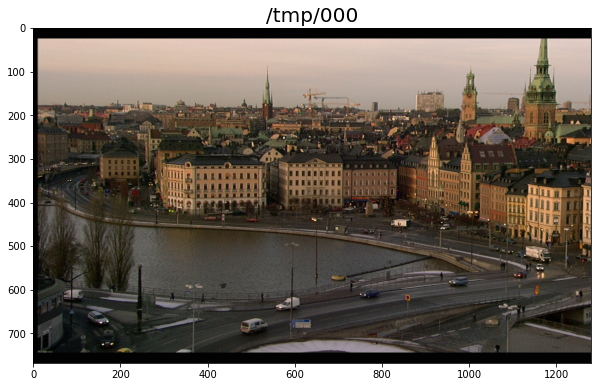

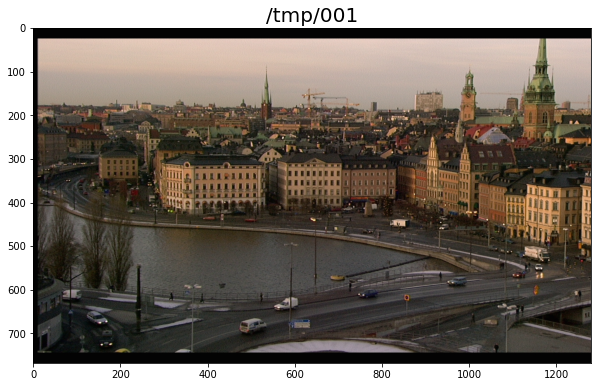

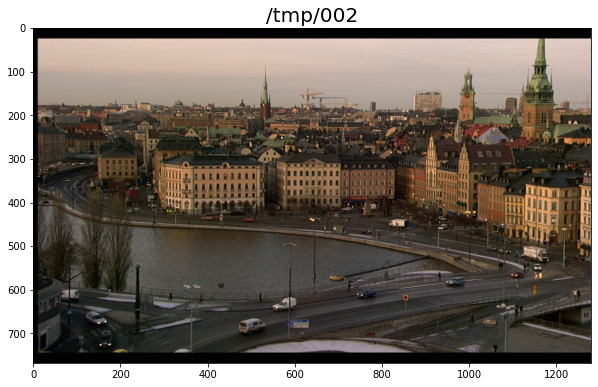

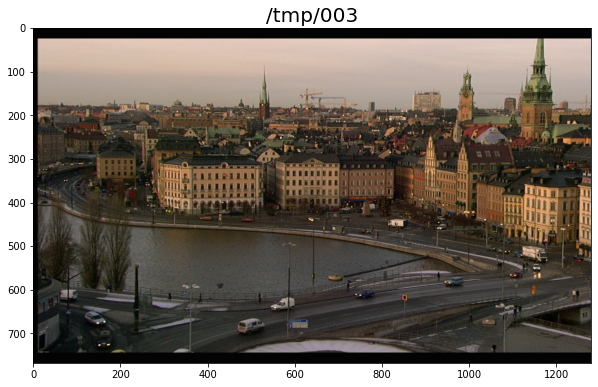

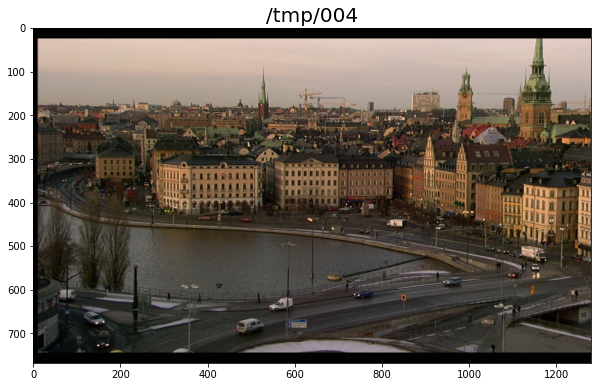

In [14]:
show_seq("/tmp/")

Mostramos algunas estadísticas de la secuencia original y de la reconstruída:

In [ ]:
%%bash 
 
# Show some statistics.
for i in {0..4}; do
  ii=$(printf "%03d" $i);
  python ../tools/show_statistics.py -i ../sequences/stockholm/$ii.png;
  python ../tools/show_statistics.py -i /tmp/$ii.png;
done  

Las imágenes reconstruídas son parecidas a las originales, pero no idénticas. Esto ocurre también si usamos solo la MDWT (no compensamos el movimiento).

Finalmente, mostramos las diferencia entre las secuencias original y reconstruída:

In [ ]:
%%bash 

# Visualization of the residue.  
for i in {0..4}; do ii=$(printf "%03d" $i); bash ../tools/show_differences.sh -1 /tmp/$ii.png -2 ../sequences/stockholm/$ii.png -o /tmp/diff_$ii.png; done  

In [ ]:
show_seq("/tmp/diff_")

## Este notebook está [aquí](https://github.com/vicente-gonzalez-ruiz/PRMC-experimentos/blob/master/src/PRMC_1_5.ipynb).